In [63]:
#!pip install ydata-profiling
#!pip install researchpy

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn

#Libraries for penalised regressions
from numpy import arange
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.model_selection import RepeatedKFold,  cross_val_score
from itertools import product

#Pour le test ESD
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import chi2_contingency

#Descriptive analysis
from ydata_profiling import ProfileReport

#Up_Sampling
from imblearn.over_sampling import RandomOverSampler

#Over_Sampling
from imblearn.over_sampling import SMOTE

#Réequilibrage de nos données
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

#Régression logstique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

#XGBOOST
import xgboost as xgb

#Outliers removal/correction
from scipy.stats.mstats import winsorize

#Analyse de deux variables qualit
import researchpy as rp

In [174]:
df= pd.read_excel("E:/Master2/Semestre1/SVM/data.xlsx")

In [72]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [73]:
df.columns = ['target','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18',
              'x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x34','x35','x36','x37',
              'x38','x39','x40','x41','x42','x43','x44','x45','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','x56',
              'x57','x58','x59','x60','x61','x62','x63','x64','x65','x66','x67','x68','x69','x70','x71','x72','x73','x74','x75',
              'x76','x77','x78','x79','x80','x81','x82','x83','x84','x85','x86','x87','x88','x89','x90','x91','x92','x93','x94',
              'x95']

In [74]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  6819 non-null   int64  
 1   x1      6819 non-null   float64
 2   x2      6819 non-null   float64
 3   x3      6819 non-null   float64
 4   x4      6819 non-null   float64
 5   x5      6819 non-null   float64
 6   x6      6819 non-null   float64
 7   x7      6819 non-null   float64
 8   x8      6819 non-null   float64
 9   x9      6819 non-null   float64
 10  x10     6819 non-null   float64
 11  x11     6819 non-null   float64
 12  x12     6819 non-null   float64
 13  x13     6819 non-null   float64
 14  x14     6819 non-null   float64
 15  x15     6819 non-null   float64
 16  x16     6819 non-null   float64
 17  x17     6819 non-null   float64
 18  x18     6819 non-null   float64
 19  x19     6819 non-null   float64
 20  x20     6819 non-null   float64
 21  x21     6819 non-null   float64
 22  

(6819, 96)

## Nettoyage de la base de donnée

### Gestion des valeurs manquantes

In [75]:
df.duplicated().sum() 

0

In [76]:
# Visualisation du nombre de valeurs manquantes
na = df.isna().sum()/df.shape[0]*100
na.sort_values()

target    0.0
x69       0.0
x68       0.0
x67       0.0
x66       0.0
         ... 
x27       0.0
x26       0.0
x25       0.0
x94       0.0
x95       0.0
Length: 96, dtype: float64

### Traitement des Outliers

In [77]:
# Traitements des outliers graçe à cette fonction trouv

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile (feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for x in df:
    df2 = outliers_removal(df[x],str(x),df) ;
    
#Source : https://www.kaggle.com/code/marto24/bankruptcy-detection?scriptVersionId=56676526&cellId=26

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
target Lower: 0.0
target Upper: 0.0
target outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
x1 Lower: 0.38797348023204903
x1 Upper: 0.624116413981377
x1 outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
x2 Lower: 0.45512156563454
x2 Upper: 0.66957860880942
x2 outliers for close to bankruptcy cases: 561
-----------------------------------------------------------------
Quartile 25: 0.527276620804112 | Quartile 75: 0.584105144815033
iqr: 0.05682852401092098
Cut Off: 0.08524278601638147
x3 Lower: 0.4420338347877305
x3 Upper: 0.6693479308314144
x3 outliers for close to bankruptcy cases: 432


-----------------------------------------------------------------
Quartile 25: 0.37474851905666695 | Quartile 75: 0.386731120301032
iqr: 0.011982601244365065
Cut Off: 0.017973901866547598
x32 Lower: 0.3567746171901194
x32 Upper: 0.40470502216757964
x32 outliers for close to bankruptcy cases: 617
-----------------------------------------------------------------
Quartile 25: 0.00755504663011965 | Quartile 75: 0.0162695280201934
iqr: 0.00871448139007375
Cut Off: 0.013071722085110626
x33 Lower: -0.005516675454990976
x33 Upper: 0.02934125010530403
x33 outliers for close to bankruptcy cases: 589
-----------------------------------------------------------------
Quartile 25: 0.004725903227376101 | Quartile 75: 0.01224910697241505
iqr: 0.00752320374503895
Cut Off: 0.011284805617558425
x34 Lower: -0.006558902390182324
x34 Upper: 0.023533912589973477
x34 outliers for close to bankruptcy cases: 591
-----------------------------------------------------------------
Quartile 25: 0.63061225188696 | Qu

-----------------------------------------------------------------
Quartile 25: 0.0031631476746991002 | Quartile 75: 0.011146766748190151
iqr: 0.007983619073491051
Cut Off: 0.011975428610236576
x63 Lower: -0.008812280935537476
x63 Upper: 0.023122195358426727
x63 outliers for close to bankruptcy cases: 426
-----------------------------------------------------------------
Quartile 25: 0.6269807662218725 | Quartile 75: 0.942026693700069
iqr: 0.3150459274781965
Cut Off: 0.47256889121729473
x64 Lower: 0.15441187500457776
x64 Upper: 1.4145955849173637
x64 outliers for close to bankruptcy cases: 40
-----------------------------------------------------------------
Quartile 25: 0.733611818564342 | Quartile 75: 0.738559910578823
iqr: 0.004948092014480987
Cut Off: 0.0074221380217214805
x65 Lower: 0.7261896805426205
x65 Upper: 0.7459820486005444
x65 outliers for close to bankruptcy cases: 153
-----------------------------------------------------------------
Quartile 25: 0.328095841686878 | Quartile

Quartile 25: 1.0 | Quartile 75: 1.0
iqr: 0.0
Cut Off: 0.0
x94 Lower: 1.0
x94 Upper: 1.0
x94 outliers for close to bankruptcy cases: 0
-----------------------------------------------------------------
Quartile 25: 0.024476693570910098 | Quartile 75: 0.052837817459331596
iqr: 0.028361123888421498
Cut Off: 0.04254168583263225
x95 Lower: -0.018064992261722153
x95 Upper: 0.09537950329196385
x95 outliers for close to bankruptcy cases: 549
-----------------------------------------------------------------


In [78]:
df2.shape, df.shape
diff = len(df.axes[0]) - len(df2.axes[0])

print ("Après le traitement des outliers nous nous retrouvons avec", diff, "observations en moins")

Après le traitement des outliers nous nous retrouvons avec 549 observations en moins


## Statistiques descriptives

In [79]:
from sklearn.model_selection import train_test_split
target= df2['target']
X= df2.drop(['target'], axis=1)

In [80]:
X.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95
count,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,...,6270.000000,6.270000e+03,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.000000,6270.0,6270.000000
mean,0.505080,0.558403,0.553447,0.607232,0.607211,0.998754,0.797187,0.809079,0.303621,0.781380,...,0.807503,1.594482e+07,0.623764,0.607230,0.840366,0.280795,0.027606,0.565373,1.0,0.037347
std,0.059819,0.064196,0.060618,0.013592,0.013571,0.013558,0.013402,0.014170,0.011635,0.013207,...,0.039779,3.395291e+08,0.010699,0.013592,0.015128,0.015007,0.016338,0.013779,0.0,0.018390
min,0.000000,0.000000,0.000000,0.432653,0.432653,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.432654,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.476966,0.536143,0.527772,0.600225,0.600212,0.998971,0.797387,0.809312,0.303465,0.781568,...,0.796907,9.559032e-04,0.623622,0.600224,0.840129,0.277347,0.026791,0.565158,1.0,0.023761
50%,0.502754,0.559693,0.552278,0.605525,0.605511,0.999021,0.797460,0.809373,0.303523,0.781633,...,0.810372,2.171467e-03,0.623855,0.605523,0.841210,0.279112,0.026815,0.565283,1.0,0.032041
75%,0.534637,0.588121,0.582941,0.612858,0.612792,0.999088,0.797568,0.809460,0.303580,0.781726,...,0.825821,5.533255e-03,0.624119,0.612856,0.842381,0.281803,0.026928,0.565795,1.0,0.046423
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.999778,1.000000,1.000000,1.000000,1.000000,...,0.981315,9.820000e+09,0.956387,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.095322


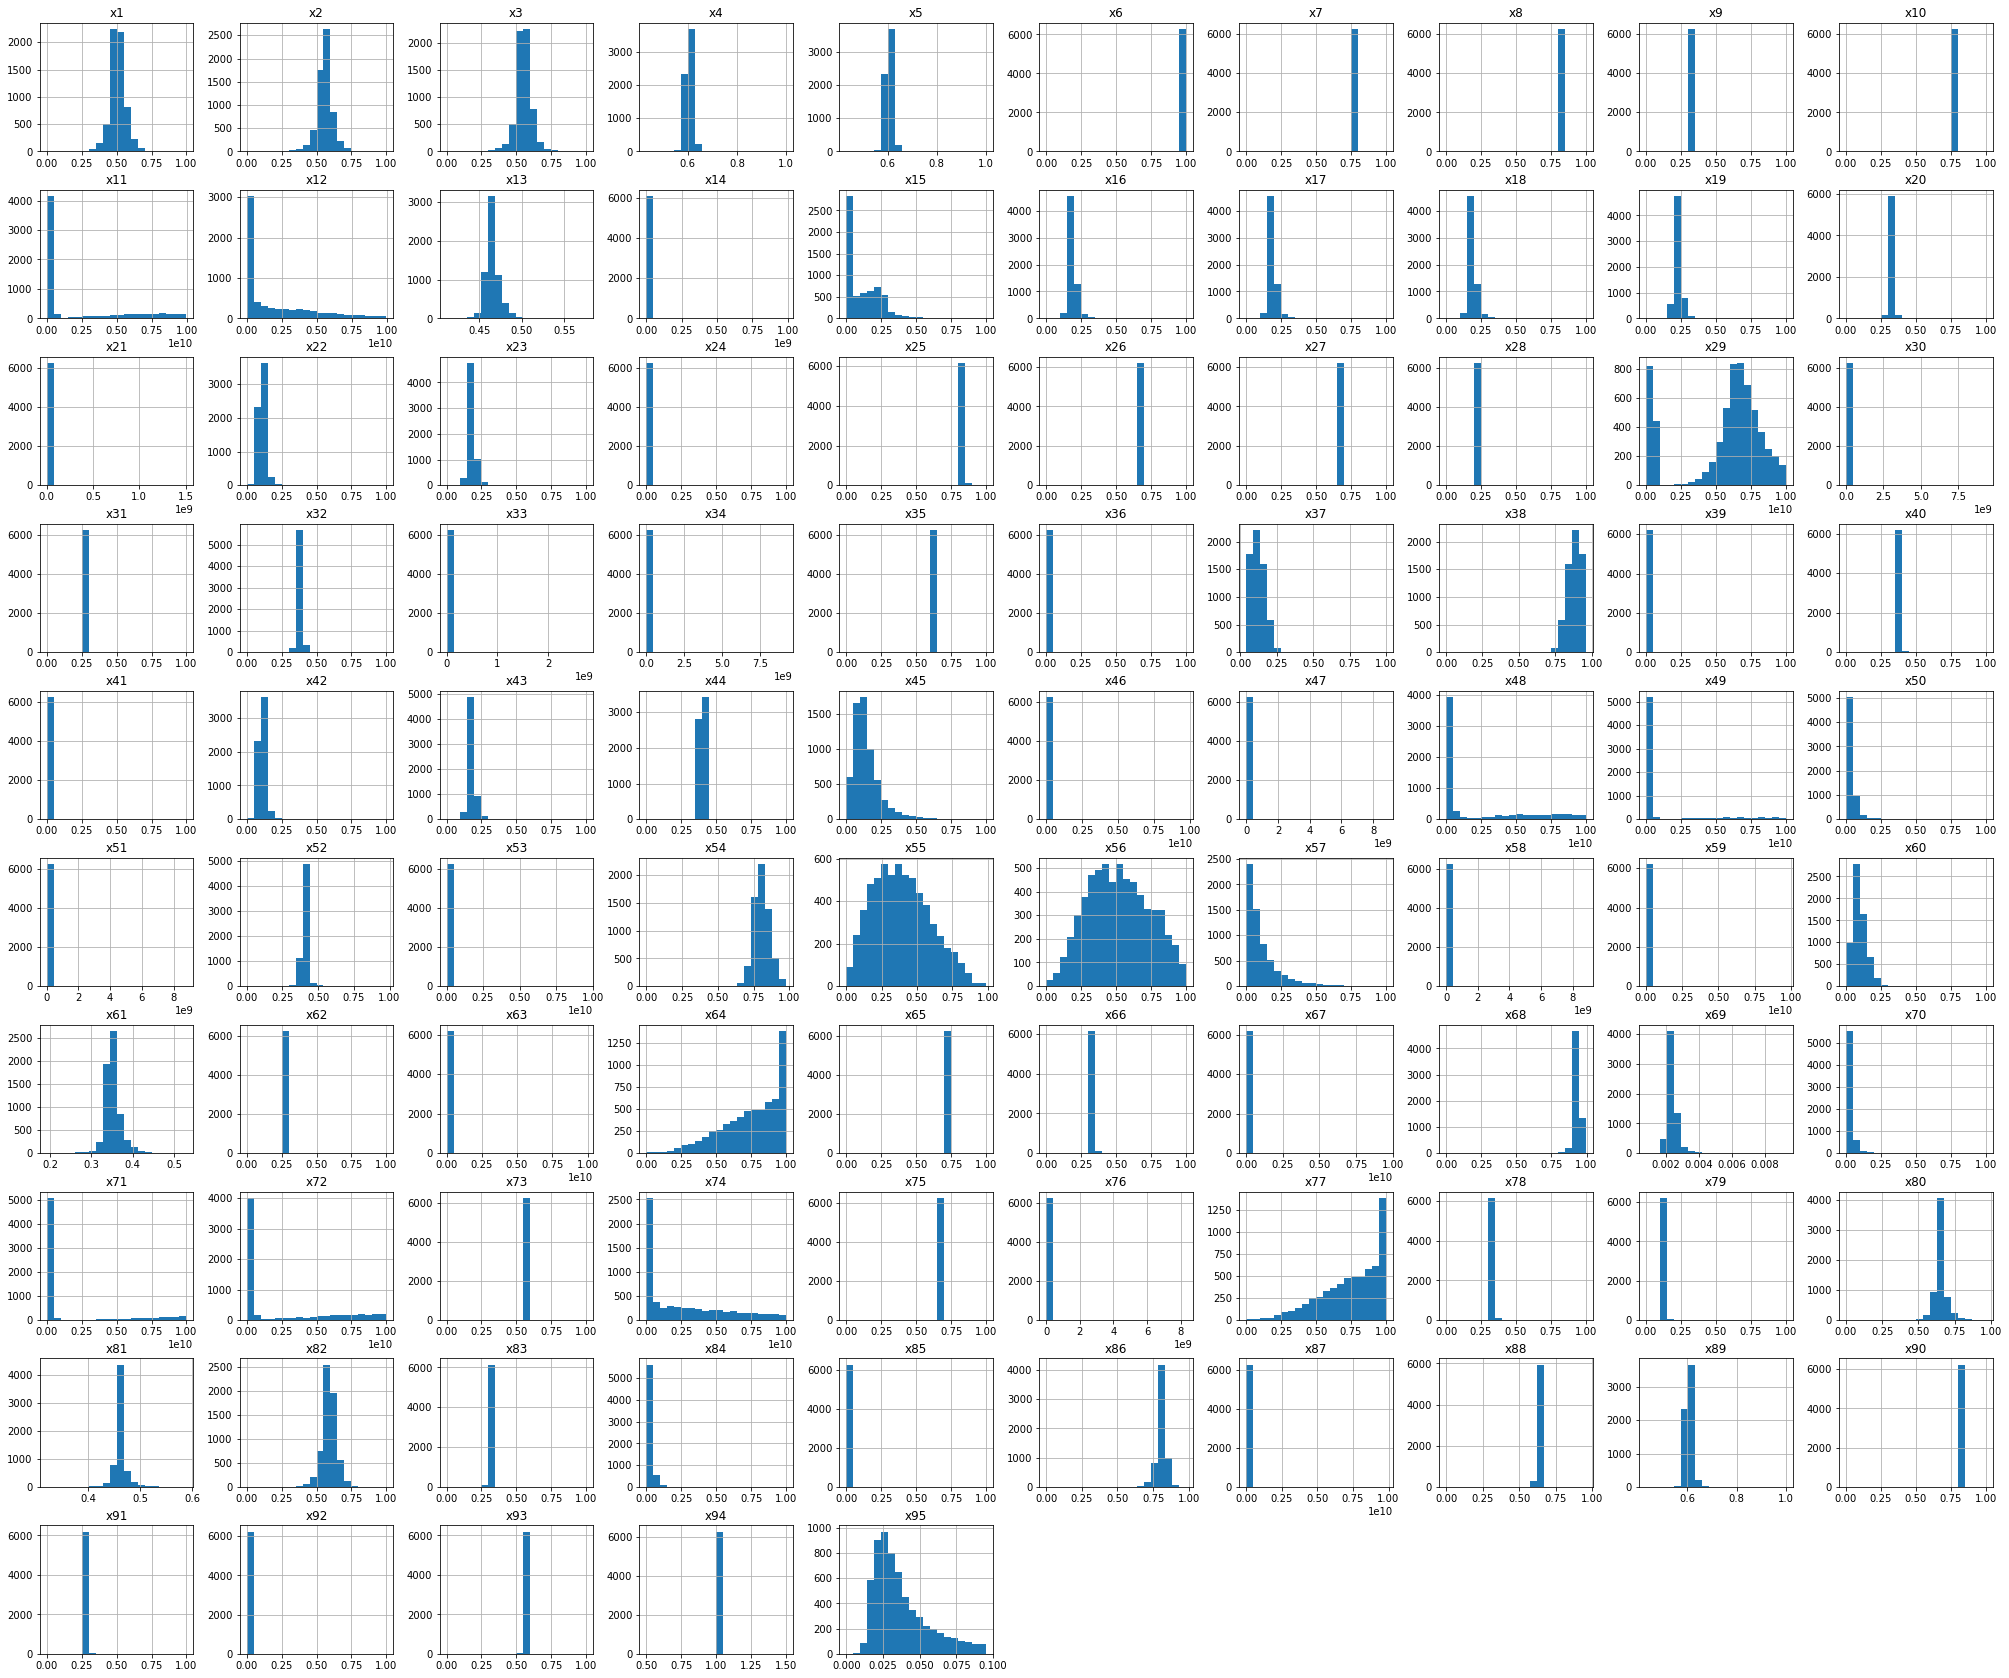

In [81]:
X.hist(figsize = (35,30), bins = 20)
plt.show()

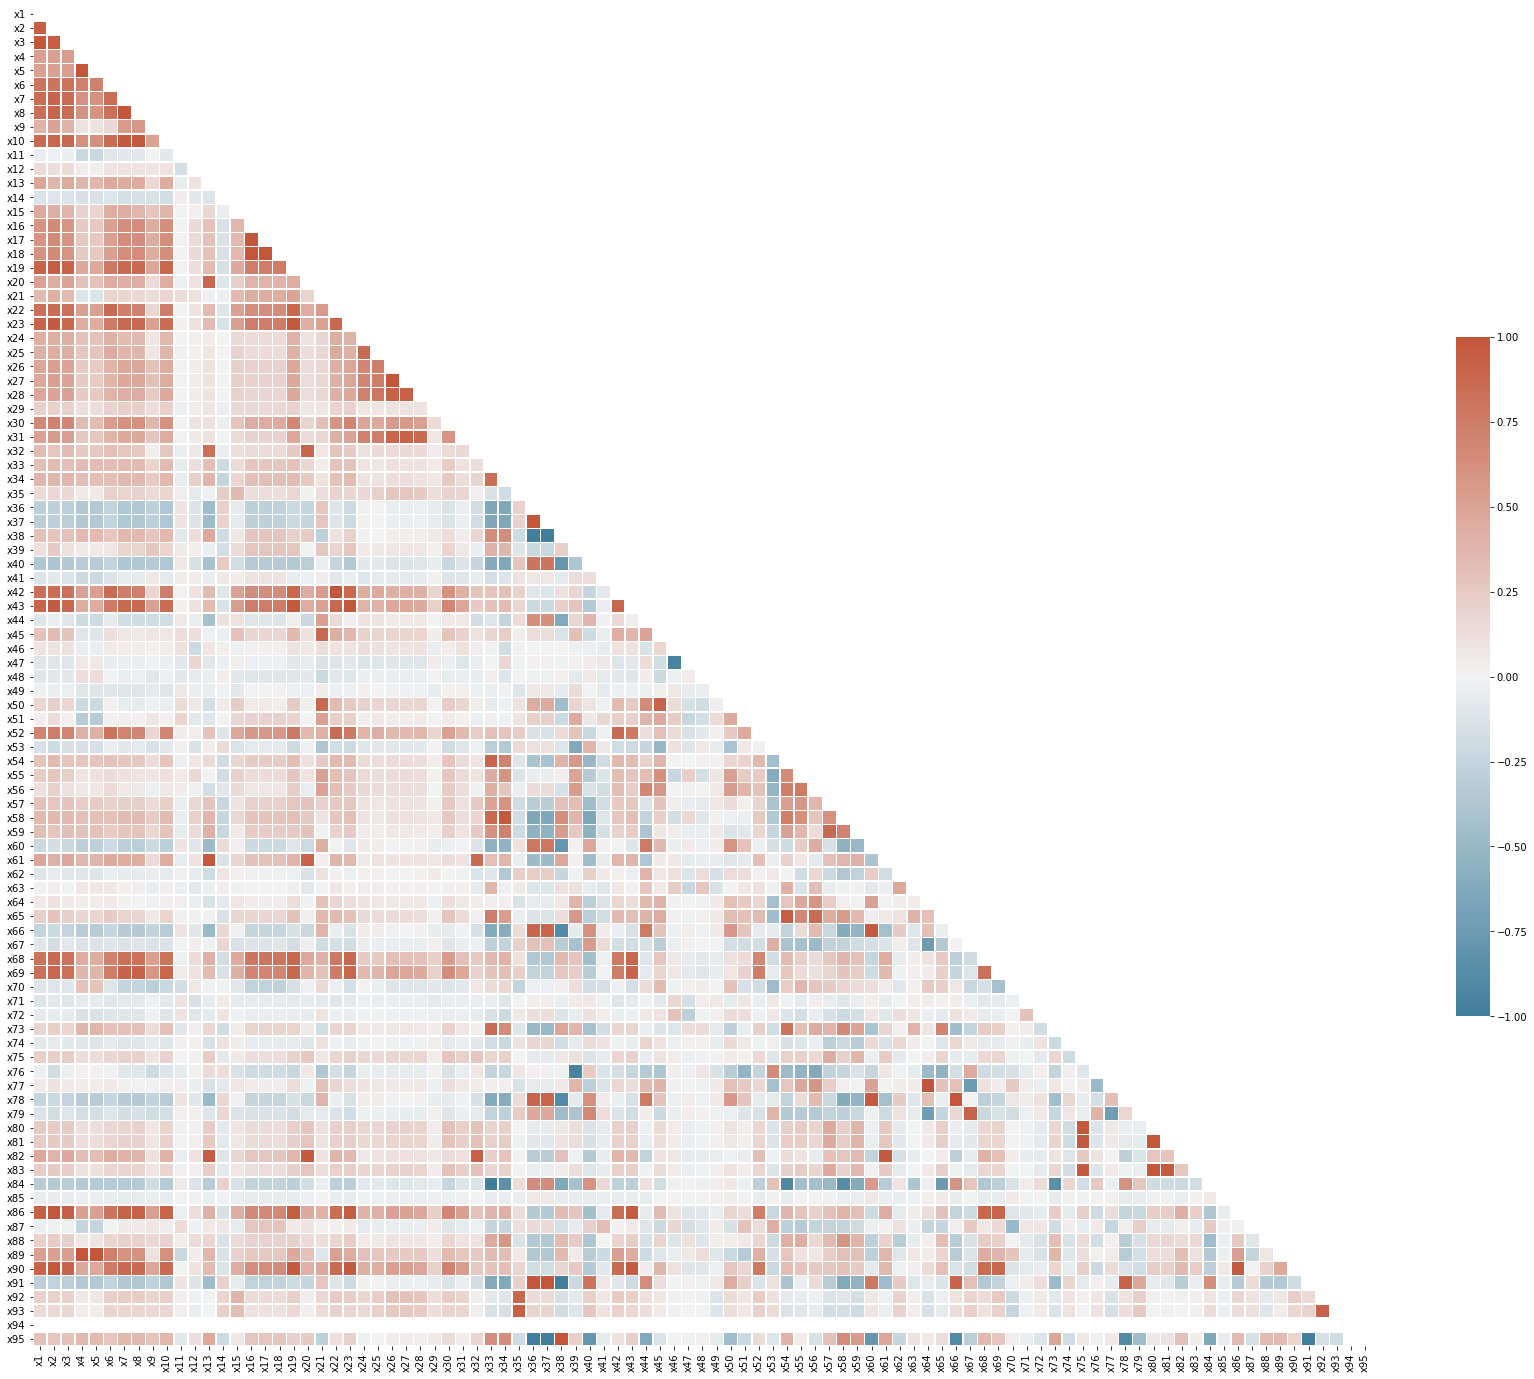

In [82]:
f, ax = plt.subplots(figsize=(30, 25))
mat = X.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Recodage des variables catégorielles

In [83]:
# Implementation des type booléen sur les features
for col_name in X.columns:
    if(X[col_name].dtype == 'int64'):
        X[col_name]= X[col_name].astype('bool')
        
# Implementation du type booléen sur la target
target= target.astype(bool)


In [84]:
X.info()
X.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6270 entries, 0 to 6817
Data columns (total 95 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6270 non-null   float64
 1   x2      6270 non-null   float64
 2   x3      6270 non-null   float64
 3   x4      6270 non-null   float64
 4   x5      6270 non-null   float64
 5   x6      6270 non-null   float64
 6   x7      6270 non-null   float64
 7   x8      6270 non-null   float64
 8   x9      6270 non-null   float64
 9   x10     6270 non-null   float64
 10  x11     6270 non-null   float64
 11  x12     6270 non-null   float64
 12  x13     6270 non-null   float64
 13  x14     6270 non-null   float64
 14  x15     6270 non-null   float64
 15  x16     6270 non-null   float64
 16  x17     6270 non-null   float64
 17  x18     6270 non-null   float64
 18  x19     6270 non-null   float64
 19  x20     6270 non-null   float64
 20  x21     6270 non-null   float64
 21  x22     6270 non-null   float64
 22  

(6270, 95)

In [85]:
# On vérifie la répartition des variables booléens
rp.summary_cat(X[["x85", "x94"]])

,Variable,Outcome,Count,Percent
0,x85,False,6262,99.87
1,,True,8,0.13
2,x94,True,6270,100.00


Nous remarquons que la variable x94 est constitué de 100% de TRUE. Nous decidons de la supprimer car elle n'a pas d'intérêt 
explicatif

In [86]:
X= X.drop(['x94'], axis=1)

In [87]:
# On verifie l'équilibre la repartition de  la target
target.value_counts(normalize=True)

False    0.965231
True     0.034769
Name: target, dtype: float64

Text(0.5, 1.0, 'Target feature - Bankrupt?')

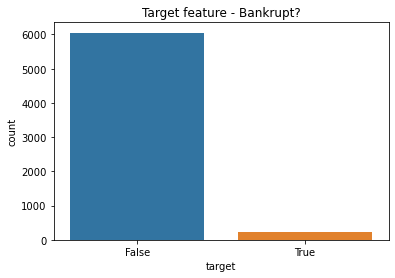

In [88]:
sns.countplot(x=target)
plt.title('Target feature - Bankrupt?')

## Oversampling

In [89]:
from imblearn.over_sampling import RandomOverSampler

rOs = RandomOverSampler()
X_ro, Y_ro = rOs.fit_resample(X, target)

Text(0.5, 1.0, 'Target feature - Bankrupt?')

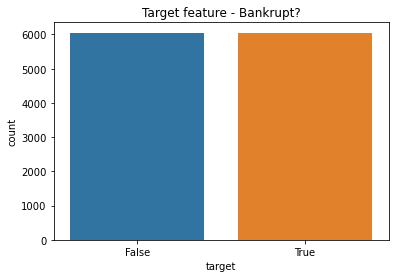

In [39]:
sns.countplot(x=Y_ro)
plt.title('Target feature - Bankrupt?')

Text(0.5, 1.0, 'Target feature - Bankrupt?')

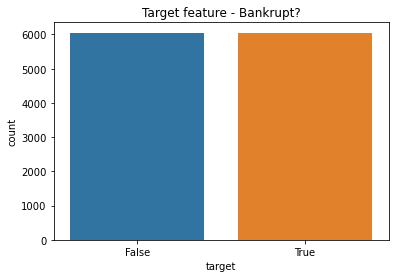

In [90]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_ro, Y_ro =oversample.fit_resample(X,target)
sns.countplot(x=Y_ro)
plt.title('Target feature - Bankrupt?')

In [91]:
Y_ro.value_counts(normalize=True)

False    0.5
True     0.5
Name: target, dtype: float64

# <center>Modelisation sans feature selection<center>

## Standardisation et Split

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale=scaler.fit_transform(X_ro)
X_scale= X_ro

#On standardise les variables numériques
scaler.fit_transform(X_scale[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18',
              'x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x34','x35','x36','x37',
              'x38','x39','x40','x41','x42','x43','x44','x45','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','x56',
              'x57','x58','x59','x60','x61','x62','x63','x64','x65','x66','x67','x68','x69','x70','x71','x72','x73','x74','x75',
              'x76','x77','x78','x79','x80','x81','x82','x83','x84','x86','x87','x88','x89','x90','x91','x92','x93','x95']].values)


array([[-1.24043869e+00, -9.74156384e-01, -1.29610911e+00, ...,
        -9.08671430e-02, -1.16208664e-01, -7.75114018e-01],
       [ 1.35251979e-03,  2.99151676e-01,  8.12863524e-02, ...,
         1.67147364e+01,  4.56575803e-01, -5.10618286e-01],
       [-5.05184580e-01, -1.39310247e-01, -4.70203389e-01, ...,
        -9.41093135e-02, -1.48382328e-01, -7.74785449e-01],
       ...,
       [-1.05421688e+00, -9.92852364e-01, -7.73334243e-01, ...,
        -8.70884231e-02, -8.46497758e-02, -9.37925955e-01],
       [-8.71490891e-01, -7.24560132e-01, -7.11507741e-01, ...,
        -8.42773912e-02, -6.03321718e-02, -3.50069335e-01],
       [-5.43824823e-01, -5.00487845e-01, -5.59412918e-01, ...,
        -6.56366225e-02,  1.93674890e-03,  1.06429750e-01]])

In [83]:
X_scale

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,True,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,True,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,True,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,True,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,True,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12099,0.373480,0.396653,0.412179,0.616392,0.616392,0.998661,0.796807,0.808745,0.303151,0.780970,...,0.688890,0.000428,0.623832,0.616388,0.831632,0.279330,0.026721,0.564789,True,0.031063
12100,0.348324,0.395991,0.389236,0.587004,0.587004,0.998711,0.795872,0.807888,0.301413,0.780034,...,0.709355,0.002199,0.619753,0.587002,0.827728,0.288561,0.026683,0.565979,True,0.017206
12101,0.368772,0.414271,0.409015,0.596485,0.596461,0.998876,0.797060,0.808994,0.303143,0.781224,...,0.717240,0.003814,0.623339,0.596480,0.821095,0.302787,0.026687,0.564580,True,0.014207
12102,0.489711,0.555899,0.549397,0.602271,0.602271,0.999013,0.797408,0.809348,0.303465,0.781586,...,0.804499,0.005460,0.623574,0.602268,0.841135,0.284336,0.027448,0.566950,True,0.020490


In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scale, Y_ro, test_size=0.3)

In [94]:
Y_test

3329     False
7231      True
700      False
1111     False
6780      True
         ...  
9169      True
10128     True
4490     False
4158     False
11069     True
Name: target, Length: 3632, dtype: bool

In [86]:
X_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95
5354,0.537903,0.594581,0.587237,0.604967,0.604967,0.999037,0.797598,0.809483,0.303746,0.781755,...,0.831714,0.001148,0.624048,0.604968,0.842670,0.278661,0.026793,0.565166,True,0.034553
4328,0.526349,0.583133,0.569088,0.608030,0.608030,0.999064,0.797493,0.809387,0.303507,0.781651,...,0.820063,0.000416,0.623651,0.608027,0.842712,0.284033,0.026880,0.565548,True,0.020583
3603,0.499196,0.507305,0.539269,0.592557,0.592557,0.998893,0.797286,0.809219,0.303502,0.781479,...,0.781976,0.004404,0.623485,0.592552,0.839183,0.276908,0.026750,0.564953,True,0.053712
10855,0.452391,0.500903,0.495689,0.596184,0.596184,0.998875,0.797105,0.809047,0.303224,0.781281,...,0.769406,0.023000,0.618446,0.596184,0.836068,0.289070,0.026331,0.561085,True,0.017557
5101,0.542290,0.591147,0.589593,0.613377,0.613370,0.999046,0.797492,0.809393,0.303541,0.781671,...,0.828625,0.000443,0.623841,0.613372,0.842187,0.277533,0.026804,0.565219,True,0.044180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,0.402551,0.454385,0.443898,0.600332,0.600332,0.998958,0.797016,0.808943,0.302895,0.781143,...,0.736778,0.006723,0.621533,0.600329,0.831248,0.287826,0.026450,0.561748,True,0.018268
3099,0.572417,0.604067,0.619519,0.612606,0.612606,0.999201,0.797653,0.809544,0.303500,0.781836,...,0.831259,0.017625,0.623611,0.612607,0.843068,0.280422,0.026801,0.565206,True,0.027095
9884,0.362018,0.373592,0.399428,0.600705,0.601048,0.998638,0.796503,0.808455,0.302667,0.780851,...,0.668810,0.003484,0.623066,0.600701,0.806006,0.312460,0.026630,0.564200,True,0.012897
9217,0.442651,0.487503,0.492965,0.605357,0.606391,0.998981,0.797240,0.809175,0.303239,0.781447,...,0.758480,0.000647,0.624142,0.605356,0.837593,0.282900,0.030479,0.567835,True,0.027606


## Regression logistique

### Initialisation des modèles 

In [ ]:
# 'saga'
# 'newton-cg'
# 'newton-cholesky'
# 'sag'

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [96]:
log_reg1=LogisticRegression()
log_reg2=LogisticRegression(solver='newton-cg')
log_reg3=LogisticRegression(solver='saga')

### Modèle 1

In [97]:
log_reg1.fit(X_train,Y_train)
log_pred1= log_reg1.predict(X_test)
print(classification_report(Y_test,log_pred1))

              precision    recall  f1-score   support

       False       0.56      0.78      0.65      1776
        True       0.65      0.41      0.50      1856

    accuracy                           0.59      3632
   macro avg       0.60      0.59      0.57      3632
weighted avg       0.61      0.59      0.57      3632



C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


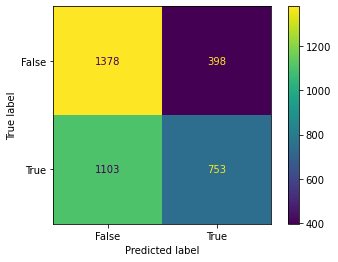

In [98]:
#Matrice de confusion
log_matrix1= confusion_matrix(Y_test,log_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=log_matrix1,
                             display_labels=log_reg1.classes_)
disp.plot()
plt.show()

In [212]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import f1_score


# confusion_matrix(Y_test,log_pred), accuracy_score(Y_test,log_pred), recall_score(Y_test,log_pred), precision_score(Y_test,log_pred),f1_score(Y_test,log_pred)

(array([[1465,  515],
        [ 996,  984]], dtype=int64),
 0.6184343434343434,
 0.49696969696969695,
 0.6564376250833889,
 0.5656797930439782)

### Modèle 2

In [99]:
log_reg2.fit(X_train,Y_train)
log_pred2= log_reg2.predict(X_test)
print(classification_report(Y_test,log_pred2))

C:\Users\sidiT\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sidiT\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

       False       0.56      0.78      0.65      1776
        True       0.66      0.41      0.50      1856

    accuracy                           0.59      3632
   macro avg       0.61      0.59      0.57      3632
weighted avg       0.61      0.59      0.57      3632



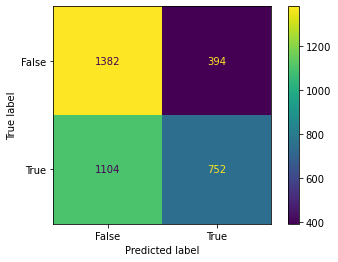

In [100]:
#Matrice de confusion
log_matrix2= confusion_matrix(Y_test,log_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=log_matrix2,
                             display_labels=log_reg2.classes_)
disp.plot()
plt.show()

### Modèle 3

In [101]:
log_reg3.fit(X_train,Y_train)
log_pred3= log_reg3.predict(X_test)
print(classification_report(Y_test,log_pred3))

              precision    recall  f1-score   support

       False       0.56      0.78      0.65      1776
        True       0.66      0.40      0.50      1856

    accuracy                           0.59      3632
   macro avg       0.61      0.59      0.57      3632
weighted avg       0.61      0.59      0.57      3632



C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


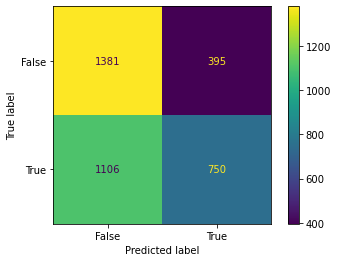

In [102]:
#Matrice de confusion
log_matrix3= confusion_matrix(Y_test,log_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=log_matrix3,
                             display_labels=log_reg3.classes_)
disp.plot()
plt.show()

## Arbre de décision

In [103]:
from sklearn import tree 

### Modèle 1

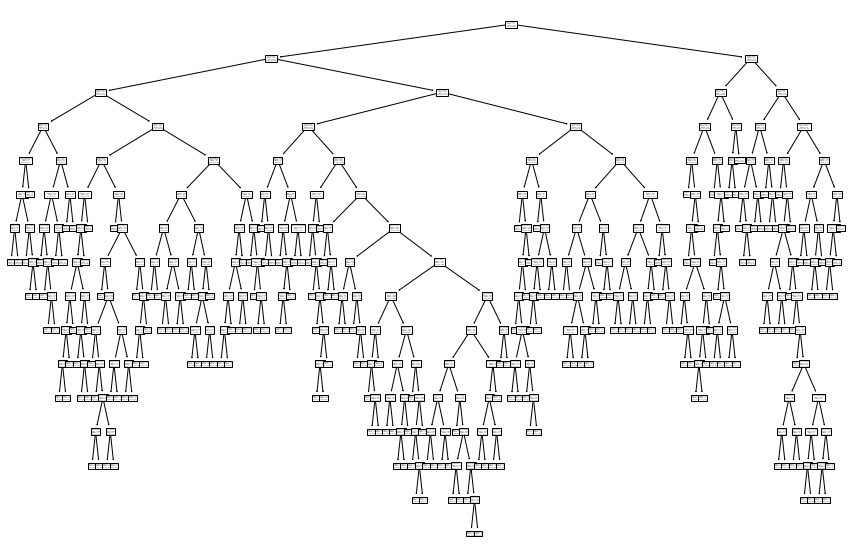

In [104]:
# Initialisation
clf1 = tree.DecisionTreeClassifier(criterion='log_loss')
clf1=clf1.fit(X_train,Y_train)

#Visualisation de l'arbre
plt.figure(figsize=(15,10))
tree.plot_tree(clf1);

In [105]:
# Calcul des metrics
clf1_pred= clf1.predict(X_test)
print(classification_report(Y_test,clf1_pred))

              precision    recall  f1-score   support

       False       0.97      0.93      0.95      1776
        True       0.93      0.97      0.95      1856

    accuracy                           0.95      3632
   macro avg       0.95      0.95      0.95      3632
weighted avg       0.95      0.95      0.95      3632



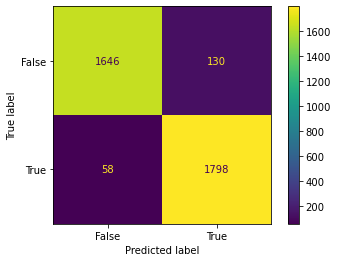

In [106]:
#Matrice de confusionclf1_pred1
clf1_matrix= confusion_matrix(Y_test,clf1_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=clf1_matrix,
                             display_labels=clf1.classes_)
disp.plot()
plt.show()

### Modèle 2

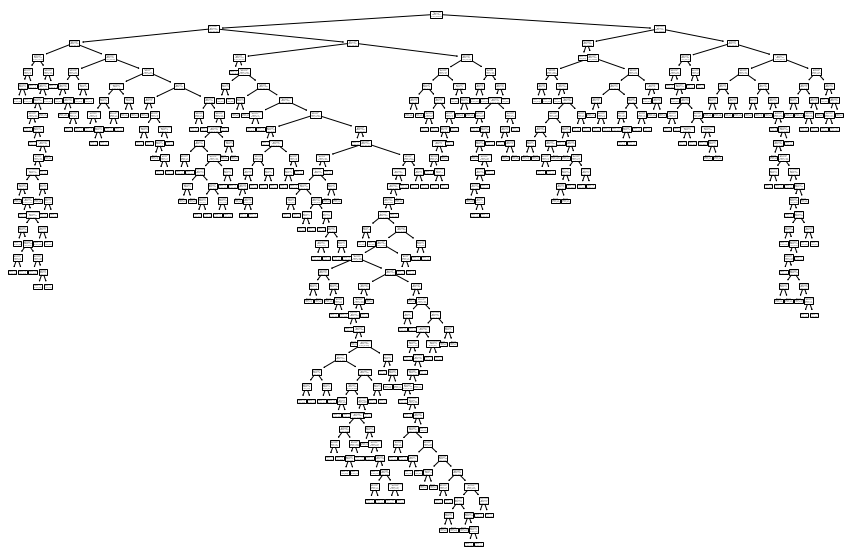

In [107]:
# Initialisation
clf2 = tree.DecisionTreeClassifier(criterion='gini')
clf2=clf2.fit(X_train,Y_train)

#Visusalisation de l'arbre
plt.figure(figsize=(15,10))
tree.plot_tree(clf2);

In [108]:
# Calcul des metrics
clf2_pred= clf2.predict(X_test)
print(classification_report(Y_test,clf2_pred))

              precision    recall  f1-score   support

       False       0.97      0.94      0.95      1776
        True       0.94      0.97      0.96      1856

    accuracy                           0.95      3632
   macro avg       0.96      0.95      0.95      3632
weighted avg       0.96      0.95      0.95      3632



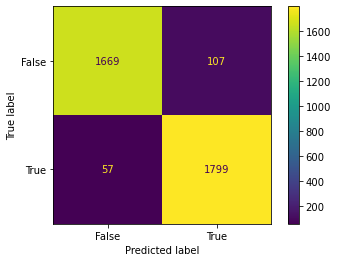

In [109]:
#Matrice de confusionclf1_pred1
clf2_matrix= confusion_matrix(Y_test,clf2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=clf2_matrix,
                             display_labels=clf2.classes_)
disp.plot()
plt.show()

### Modèle3

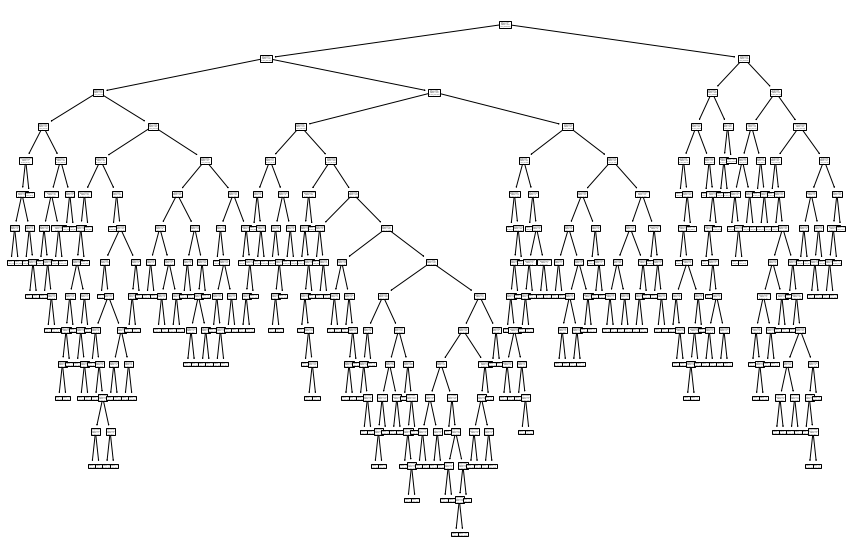

In [110]:
# Initialisation
clf3 = tree.DecisionTreeClassifier(criterion='entropy')
clf3=clf3.fit(X_train,Y_train)

#Visusalisation de l'arbre
plt.figure(figsize=(15,10))
tree.plot_tree(clf3);

In [111]:
# Calcul des metrics
clf3_pred= clf3.predict(X_test)
print(classification_report(Y_test,clf3_pred))

              precision    recall  f1-score   support

       False       0.97      0.94      0.95      1776
        True       0.94      0.97      0.96      1856

    accuracy                           0.96      3632
   macro avg       0.96      0.96      0.96      3632
weighted avg       0.96      0.96      0.96      3632



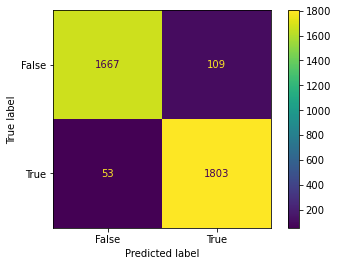

In [112]:
#Matrice de confusionclf1_pred1
clf3_matrix= confusion_matrix(Y_test,clf3_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=clf3_matrix,
                             display_labels=clf3.classes_)
disp.plot()
plt.show()

## Random forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
# Initialisation
rf = RandomForestClassifier(criterion='entropy',n_estimators = 200, random_state = 2020)
#Et on lance le training sur notre dataset de train
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=2020)

In [115]:
# Calcul des metrics
rf_pred= rf.predict(X_test)
print(classification_report(Y_test,rf_pred))

              precision    recall  f1-score   support

       False       1.00      0.96      0.98      1776
        True       0.96      1.00      0.98      1856

    accuracy                           0.98      3632
   macro avg       0.98      0.98      0.98      3632
weighted avg       0.98      0.98      0.98      3632



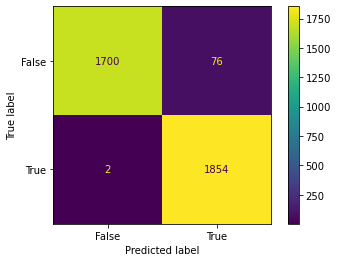

In [116]:
#Matrice de confusionclf1_pred1
rf_matrix= confusion_matrix(Y_test,rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_matrix,
                             display_labels=rf.classes_)
disp.plot()
plt.show()

## XGboost

In [117]:
import xgboost as xgb

In [118]:
# Initialisation
xg_boost= xgb.XGBClassifier()
xg_boost.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [119]:
# Calcul des metrics
xgb_pred= xg_boost.predict(X_test)
print(classification_report(Y_test,xgb_pred))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98      1776
        True       0.97      1.00      0.99      1856

    accuracy                           0.98      3632
   macro avg       0.99      0.98      0.98      3632
weighted avg       0.99      0.98      0.98      3632



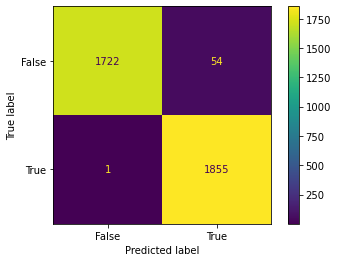

In [120]:
#Matrice de confusionclf1_pred1
xgb_matrix= confusion_matrix(Y_test,xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_matrix,
                             display_labels=rf.classes_)
disp.plot()
plt.show()

### SVM Lineaire

In [121]:
from sklearn.svm import LinearSVC

In [122]:
svm_clf= LinearSVC()

svm_clf.fit(X_train, Y_train)

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [123]:
svm_clf_pred= svm_clf.predict(X_test)
print(classification_report(Y_test,svm_clf_pred))

              precision    recall  f1-score   support

       False       0.49      0.99      0.66      1776
        True       0.62      0.02      0.03      1856

    accuracy                           0.49      3632
   macro avg       0.55      0.50      0.34      3632
weighted avg       0.55      0.49      0.34      3632



### SVM non linéaire

In [124]:
from sklearn.svm import SVC

svc_clf= SVC(kernel="poly")
svc_clf.fit(X_train, Y_train)

SVC(kernel='poly')

In [125]:
svc_clf_pred= svc_clf.predict(X_test)
print(classification_report(Y_test,svc_clf_pred))

              precision    recall  f1-score   support

       False       0.80      0.66      0.72      1776
        True       0.72      0.84      0.78      1856

    accuracy                           0.75      3632
   macro avg       0.76      0.75      0.75      3632
weighted avg       0.76      0.75      0.75      3632



### Perception

In [126]:
from sklearn.linear_model import Perceptron
per_clf = Perceptron()
per_clf.fit(X_train, Y_train)

Perceptron()

In [127]:
per_pred = per_clf.predict(X_test)
print(classification_report(Y_test,per_pred))

              precision    recall  f1-score   support

       False       0.56      0.73      0.64      1776
        True       0.64      0.46      0.53      1856

    accuracy                           0.59      3632
   macro avg       0.60      0.60      0.59      3632
weighted avg       0.60      0.59      0.58      3632



### Keras

In [128]:
#Import tensorflow et keras
import tensorflow as tf
from tensorflow import keras

#Initialisation
keras_model = keras.models.Sequential()

keras_model.add(keras.layers.Input(shape=X_train.shape[1])) #input layer
keras_model.add(keras.layers.Dense(100, activation='relu')) #Hidden layer, 100 neurones
keras_model.add(keras.layers.Dense(1))#Output layer

#Définir fonction de perte
keras_model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#binary_crossentropy / offrent des resultat similaires


In [213]:
# keras_model = keras.models.Sequential([
# keras.layers.Flatten(input_shape=[95]),
# keras.layers.Dense(300, activation="relu"),
# keras.layers.Dense(100, activation="relu"),
# keras.layers.Dense(10, activation="softmax")
# ])

In [129]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               9500      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [130]:
#Transformation en nimpy
X_train_np = np.asarray(X_train).astype(np.float32)
X_test_np = np.asarray(X_test).astype(np.float32)
Y_train_np= np.asarray(Y_train).astype(np.float32)
Y_test_np = np.asarray(Y_test).astype(np.float32)

In [131]:
from keras.callbacks import History 
history = History()

In [132]:
# Entrainement
keras_model.fit(X_train_np, Y_train_np, epochs=30,validation_split=0.2, callbacks=[history])

Epoch 1/30
212/212 [==============================] - 3s 6ms/step - loss: 7.4145 - accuracy: 0.5144 - val_loss: 7.5066 - val_accuracy: 0.5086
Epoch 2/30
212/212 [==============================] - 1s 4ms/step - loss: 7.4101 - accuracy: 0.5147 - val_loss: 7.4976 - val_accuracy: 0.5091
Epoch 3/30
212/212 [==============================] - 1s 4ms/step - loss: 7.4124 - accuracy: 0.5145 - val_loss: 7.4976 - val_accuracy: 0.5091
Epoch 4/30
212/212 [==============================] - 1s 4ms/step - loss: 7.4102 - accuracy: 0.5147 - val_loss: 7.5068 - val_accuracy: 0.5086
Epoch 5/30
212/212 [==============================] - 1s 4ms/step - loss: 7.4057 - accuracy: 0.5150 - val_loss: 7.5068 - val_accuracy: 0.5086
Epoch 6/30
212/212 [==============================] - 1s 4ms/step - loss: 7.4057 - accuracy: 0.5150 - val_loss: 7.5068 - val_accuracy: 0.5086
Epoch 7/30
212/212 [==============================] - 1s 4ms/step - loss: 7.4057 - accuracy: 0.5150 - val_loss: 7.5068 - val_accuracy: 0.5086
Epoch 

In [133]:
# Évaluation du modèle
keras_model.evaluate(X_test_np, Y_test_np)

114/114 [==============================] - 0s 3ms/step - loss: 7.3841 - accuracy: 0.5165


[7.384074687957764, 0.5165198445320129]

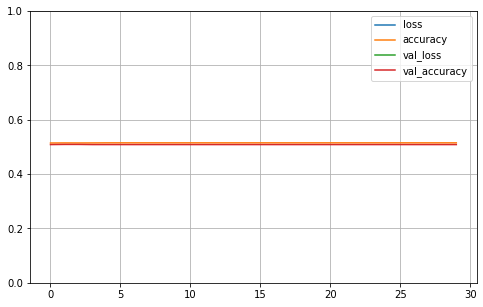

In [134]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

### Comparaison des modèles

In [222]:
log3 = cross_val_score(log_reg3, X_train, Y_train, cv=10, scoring='accuracy')

perceptron = cross_val_score(per_clf, X_train, Y_train, cv=10, scoring='accuracy')

SVC = cross_val_score(svc_clf, X_train, Y_train, cv=10, scoring='accuracy')

SVM_L = cross_val_score(svm_clf, X_train, Y_train, cv=10, scoring='accuracy')

XG_Boost = cross_val_score(xg_boost, X_train, Y_train, cv=10, scoring='accuracy')

RF = cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy')

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [227]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[log3, perceptron, SVC, SVM_L, XG_Boost, RF]), 
                        columns=['fold1','fold2','fold3','fold4','fold5','fold6','fold7','fold8','fold9','fold10'])
#Adding model label
df_cross['model'] = ['log3', 'perceptron', 'SVC', 'SVM_L', 'XG_Boost', 'RF']

In [229]:
df_cross

,fold1,fold2,fold3,fold4,fold5,fold6,fold7,fold8,fold9,fold10,model
0,0.602594,0.581368,0.587957,0.609209,0.592680,0.617473,0.619835,0.576151,0.598583,0.593861,log3
1,0.520047,0.581368,0.499410,0.559622,0.499410,0.539551,0.538371,0.554900,0.552538,0.525384,perceptron
2,0.755896,0.738208,0.750885,0.755608,0.756789,0.755608,0.768595,0.743802,0.770956,0.753247,SVC
3,0.454009,0.497642,0.533648,0.544274,0.479339,0.520661,0.571429,0.540732,0.501771,0.499410,SVM_L
4,0.984670,0.987028,0.982290,0.979929,0.985832,0.984652,0.981110,0.984652,0.988194,0.977568,XG_Boost
5,0.974057,0.981132,0.969303,0.968123,0.976387,0.979929,0.964581,0.978749,0.979929,0.965762,RF


In [232]:
df_cross.shape

(6, 11)

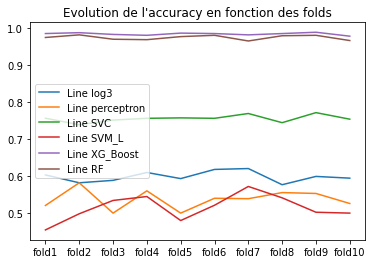

In [240]:
#Regardons l'évolution des scores pour chaque fold
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:10] ,label='Line '+str(df_cross.iloc[row,10]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

# <center>Modelisation avec feature selection<center>

## Feature selection

### Feature selection avec SDG : Pénalité ElasticNet - Base2

In [135]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.linear_model import SGDClassifier

In [136]:
from sklearn.linear_model import SGDClassifier
selector = SelectFromModel(SGDClassifier(penalty='elasticnet',random_state=2042), threshold='mean')
selector.fit_transform(X_scale,Y_ro)
selector.get_support()

#On affiche les vriable retenues
np.array(X_scale.columns)[selector.get_support()]

array(['x14', 'x21', 'x30', 'x33', 'x46', 'x47', 'x51', 'x53', 'x58',
       'x59', 'x76', 'x87'], dtype=object)

In [137]:
X2= X_scale[['x14', 'x21', 'x30', 'x33', 'x46', 'x47', 'x51', 'x53', 'x58',
       'x59', 'x76', 'x87']]

In [166]:
X2.shape

(12104, 12)

### Feature selection avec Lasso : Base 3

In [138]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=14)

#define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model.fit(X_scale, Y_ro)

#display lambda that produced the lowest test MSE
print(model.alpha_)

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 552.8025393106809, tolerance: 0.2723244836133301
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: O

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent 

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 554.1989869534111, tolerance: 0.272349990820637
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Ob

0.01


Pour de la création de la troisième base avec un modèle lasso. Nous nous servons d'un grid search afin d'avoir le meilleur alpha pour le modèle Lasso

In [139]:
# initialisation du modèle
pipeline = Pipeline([('model', Lasso())])

search = GridSearchCV(pipeline, {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 10, scoring="neg_mean_squared_error",verbose=3)
search 

GridSearchCV(cv=10, estimator=Pipeline(steps=[('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [140]:
# Initialistion de l'apprentissage
search.fit(X_train,Y_train) ;

# On affiche les meilleur alpha
search.best_params_

Fitting 10 folds for each of 99 candidates, totalling 990 fits
[CV 1/10] END ................model__alpha=0.1;, score=-0.226 total time=   0.1s
[CV 2/10] END ................model__alpha=0.1;, score=-0.223 total time=   0.1s
[CV 3/10] END ................model__alpha=0.1;, score=-0.235 total time=   0.1s
[CV 4/10] END ................model__alpha=0.1;, score=-0.227 total time=   0.1s
[CV 5/10] END ................model__alpha=0.1;, score=-0.236 total time=   0.1s
[CV 6/10] END ................model__alpha=0.1;, score=-0.229 total time=   0.2s
[CV 7/10] END ................model__alpha=0.1;, score=-0.223 total time=   0.1s
[CV 8/10] END ................model__alpha=0.1;, score=-0.228 total time=   0.1s
[CV 9/10] END ................model__alpha=0.1;, score=-0.230 total time=   0.1s
[CV 10/10] END ...............model__alpha=0.1;, score=-0.224 total time=   0.1s
[CV 1/10] END ................model__alpha=0.2;, score=-0.226 total time=   0.0s
[CV 2/10] END ................model__alpha=0.2

[CV 2/10] END ................model__alpha=1.1;, score=-0.223 total time=   0.0s
[CV 3/10] END ................model__alpha=1.1;, score=-0.235 total time=   0.0s
[CV 4/10] END ................model__alpha=1.1;, score=-0.227 total time=   0.0s
[CV 5/10] END ................model__alpha=1.1;, score=-0.236 total time=   0.0s
[CV 6/10] END ................model__alpha=1.1;, score=-0.229 total time=   0.0s
[CV 7/10] END ................model__alpha=1.1;, score=-0.223 total time=   0.0s
[CV 8/10] END ................model__alpha=1.1;, score=-0.228 total time=   0.0s
[CV 9/10] END ................model__alpha=1.1;, score=-0.230 total time=   0.0s
[CV 10/10] END ...............model__alpha=1.1;, score=-0.224 total time=   0.0s
[CV 1/10] END .model__alpha=1.2000000000000002;, score=-0.226 total time=   0.0s
[CV 2/10] END .model__alpha=1.2000000000000002;, score=-0.223 total time=   0.0s
[CV 3/10] END .model__alpha=1.2000000000000002;, score=-0.235 total time=   0.0s
[CV 4/10] END .model__alpha=

[CV 5/10] END ................model__alpha=2.1;, score=-0.236 total time=   0.0s
[CV 6/10] END ................model__alpha=2.1;, score=-0.229 total time=   0.0s
[CV 7/10] END ................model__alpha=2.1;, score=-0.223 total time=   0.0s
[CV 8/10] END ................model__alpha=2.1;, score=-0.228 total time=   0.0s
[CV 9/10] END ................model__alpha=2.1;, score=-0.230 total time=   0.0s
[CV 10/10] END ...............model__alpha=2.1;, score=-0.224 total time=   0.0s
[CV 1/10] END ................model__alpha=2.2;, score=-0.226 total time=   0.0s
[CV 2/10] END ................model__alpha=2.2;, score=-0.223 total time=   0.0s
[CV 3/10] END ................model__alpha=2.2;, score=-0.235 total time=   0.0s
[CV 4/10] END ................model__alpha=2.2;, score=-0.227 total time=   0.0s
[CV 5/10] END ................model__alpha=2.2;, score=-0.236 total time=   0.0s
[CV 6/10] END ................model__alpha=2.2;, score=-0.229 total time=   0.0s
[CV 7/10] END ..............

[CV 7/10] END ................model__alpha=3.1;, score=-0.223 total time=   0.0s
[CV 8/10] END ................model__alpha=3.1;, score=-0.228 total time=   0.0s
[CV 9/10] END ................model__alpha=3.1;, score=-0.230 total time=   0.0s
[CV 10/10] END ...............model__alpha=3.1;, score=-0.224 total time=   0.0s
[CV 1/10] END ................model__alpha=3.2;, score=-0.226 total time=   0.0s
[CV 2/10] END ................model__alpha=3.2;, score=-0.223 total time=   0.0s
[CV 3/10] END ................model__alpha=3.2;, score=-0.235 total time=   0.0s
[CV 4/10] END ................model__alpha=3.2;, score=-0.227 total time=   0.0s
[CV 5/10] END ................model__alpha=3.2;, score=-0.236 total time=   0.0s
[CV 6/10] END ................model__alpha=3.2;, score=-0.229 total time=   0.0s
[CV 7/10] END ................model__alpha=3.2;, score=-0.223 total time=   0.0s
[CV 8/10] END ................model__alpha=3.2;, score=-0.228 total time=   0.0s
[CV 9/10] END ..............

[CV 10/10] END ...............model__alpha=4.1;, score=-0.224 total time=   0.0s
[CV 1/10] END ................model__alpha=4.2;, score=-0.226 total time=   0.0s
[CV 2/10] END ................model__alpha=4.2;, score=-0.223 total time=   0.0s
[CV 3/10] END ................model__alpha=4.2;, score=-0.235 total time=   0.0s
[CV 4/10] END ................model__alpha=4.2;, score=-0.227 total time=   0.0s
[CV 5/10] END ................model__alpha=4.2;, score=-0.236 total time=   0.0s
[CV 6/10] END ................model__alpha=4.2;, score=-0.229 total time=   0.0s
[CV 7/10] END ................model__alpha=4.2;, score=-0.223 total time=   0.0s
[CV 8/10] END ................model__alpha=4.2;, score=-0.228 total time=   0.0s
[CV 9/10] END ................model__alpha=4.2;, score=-0.230 total time=   0.0s
[CV 10/10] END ...............model__alpha=4.2;, score=-0.224 total time=   0.0s
[CV 1/10] END ................model__alpha=4.3;, score=-0.226 total time=   0.0s
[CV 2/10] END ..............

[CV 2/10] END ................model__alpha=5.2;, score=-0.223 total time=   0.0s
[CV 3/10] END ................model__alpha=5.2;, score=-0.235 total time=   0.0s
[CV 4/10] END ................model__alpha=5.2;, score=-0.227 total time=   0.0s
[CV 5/10] END ................model__alpha=5.2;, score=-0.236 total time=   0.0s
[CV 6/10] END ................model__alpha=5.2;, score=-0.229 total time=   0.0s
[CV 7/10] END ................model__alpha=5.2;, score=-0.223 total time=   0.0s
[CV 8/10] END ................model__alpha=5.2;, score=-0.228 total time=   0.0s
[CV 9/10] END ................model__alpha=5.2;, score=-0.230 total time=   0.0s
[CV 10/10] END ...............model__alpha=5.2;, score=-0.224 total time=   0.0s
[CV 1/10] END ................model__alpha=5.3;, score=-0.226 total time=   0.0s
[CV 2/10] END ................model__alpha=5.3;, score=-0.223 total time=   0.0s
[CV 3/10] END ................model__alpha=5.3;, score=-0.235 total time=   0.0s
[CV 4/10] END ..............

[CV 4/10] END ................model__alpha=6.2;, score=-0.227 total time=   0.0s
[CV 5/10] END ................model__alpha=6.2;, score=-0.236 total time=   0.0s
[CV 6/10] END ................model__alpha=6.2;, score=-0.229 total time=   0.0s
[CV 7/10] END ................model__alpha=6.2;, score=-0.223 total time=   0.0s
[CV 8/10] END ................model__alpha=6.2;, score=-0.228 total time=   0.0s
[CV 9/10] END ................model__alpha=6.2;, score=-0.230 total time=   0.0s
[CV 10/10] END ...............model__alpha=6.2;, score=-0.224 total time=   0.0s
[CV 1/10] END ................model__alpha=6.3;, score=-0.226 total time=   0.0s
[CV 2/10] END ................model__alpha=6.3;, score=-0.223 total time=   0.0s
[CV 3/10] END ................model__alpha=6.3;, score=-0.235 total time=   0.0s
[CV 4/10] END ................model__alpha=6.3;, score=-0.227 total time=   0.0s
[CV 5/10] END ................model__alpha=6.3;, score=-0.236 total time=   0.0s
[CV 6/10] END ..............

[CV 6/10] END ................model__alpha=7.2;, score=-0.229 total time=   0.0s
[CV 7/10] END ................model__alpha=7.2;, score=-0.223 total time=   0.0s
[CV 8/10] END ................model__alpha=7.2;, score=-0.228 total time=   0.0s
[CV 9/10] END ................model__alpha=7.2;, score=-0.230 total time=   0.0s
[CV 10/10] END ...............model__alpha=7.2;, score=-0.224 total time=   0.0s
[CV 1/10] END ................model__alpha=7.3;, score=-0.226 total time=   0.0s
[CV 2/10] END ................model__alpha=7.3;, score=-0.223 total time=   0.0s
[CV 3/10] END ................model__alpha=7.3;, score=-0.235 total time=   0.0s
[CV 4/10] END ................model__alpha=7.3;, score=-0.227 total time=   0.0s
[CV 5/10] END ................model__alpha=7.3;, score=-0.236 total time=   0.0s
[CV 6/10] END ................model__alpha=7.3;, score=-0.229 total time=   0.0s
[CV 7/10] END ................model__alpha=7.3;, score=-0.223 total time=   0.0s
[CV 8/10] END ..............

[CV 9/10] END ................model__alpha=8.2;, score=-0.230 total time=   0.0s
[CV 10/10] END ...............model__alpha=8.2;, score=-0.224 total time=   0.0s
[CV 1/10] END ................model__alpha=8.3;, score=-0.226 total time=   0.0s
[CV 2/10] END ................model__alpha=8.3;, score=-0.223 total time=   0.0s
[CV 3/10] END ................model__alpha=8.3;, score=-0.235 total time=   0.0s
[CV 4/10] END ................model__alpha=8.3;, score=-0.227 total time=   0.0s
[CV 5/10] END ................model__alpha=8.3;, score=-0.236 total time=   0.0s
[CV 6/10] END ................model__alpha=8.3;, score=-0.229 total time=   0.0s
[CV 7/10] END ................model__alpha=8.3;, score=-0.223 total time=   0.0s
[CV 8/10] END ................model__alpha=8.3;, score=-0.228 total time=   0.0s
[CV 9/10] END ................model__alpha=8.3;, score=-0.230 total time=   0.0s
[CV 10/10] END ...............model__alpha=8.3;, score=-0.224 total time=   0.0s
[CV 1/10] END ..............

[CV 2/10] END ................model__alpha=9.3;, score=-0.223 total time=   0.0s
[CV 3/10] END ................model__alpha=9.3;, score=-0.235 total time=   0.0s
[CV 4/10] END ................model__alpha=9.3;, score=-0.227 total time=   0.0s
[CV 5/10] END ................model__alpha=9.3;, score=-0.236 total time=   0.0s
[CV 6/10] END ................model__alpha=9.3;, score=-0.229 total time=   0.0s
[CV 7/10] END ................model__alpha=9.3;, score=-0.223 total time=   0.0s
[CV 8/10] END ................model__alpha=9.3;, score=-0.228 total time=   0.0s
[CV 9/10] END ................model__alpha=9.3;, score=-0.230 total time=   0.0s
[CV 10/10] END ...............model__alpha=9.3;, score=-0.224 total time=   0.0s
[CV 1/10] END ................model__alpha=9.4;, score=-0.226 total time=   0.0s
[CV 2/10] END ................model__alpha=9.4;, score=-0.223 total time=   0.0s
[CV 3/10] END ................model__alpha=9.4;, score=-0.235 total time=   0.0s
[CV 4/10] END ..............

{'model__alpha': 9.9}

In [142]:
#Objet contenant l'ensemble des coefficients du modèle
coefficients = search.best_estimator_.named_steps['model'].coef_

# On affiche les features ayant des coefficient non nulles
importance = np.abs(coefficients)
features = X.columns
np.array(features)[importance > 0]

array(['x11', 'x12', 'x14', 'x21', 'x29', 'x30', 'x34', 'x46', 'x47',
       'x48', 'x49', 'x51', 'x53', 'x58', 'x59', 'x63', 'x67', 'x71',
       'x72', 'x74', 'x76', 'x87'], dtype=object)

In [167]:
# Création d'une base avec les valeurs retenues
X3 = X_scale[['x11', 'x12', 'x14', 'x21', 'x29', 'x30', 'x34', 'x46', 'x47',
       'x48', 'x49', 'x51', 'x53', 'x58', 'x59', 'x63', 'x67', 'x71',
       'x72', 'x74', 'x76', 'x87']]

In [168]:
X3.shape

(12104, 22)

### Feature selection RFECV

In [144]:
from sklearn.feature_selection import RFECV
selector3= RFECV(SGDClassifier(penalty='elasticnet',random_state=2042), step=10, cv= 10)
selector3.fit_transform(X_scale,Y_ro)
selector3.get_support()

#On affiche les vriable retenues
np.array(X_scale.columns)[selector3.get_support()]

C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array(['x6', 'x11', 'x12', 'x14', 'x21', 'x29', 'x30', 'x33', 'x34',
       'x46', 'x47', 'x48', 'x49', 'x51', 'x53', 'x58', 'x59', 'x63',
       'x67', 'x71', 'x72', 'x74', 'x76', 'x87'], dtype=object)

In [145]:
# Création d'une base avec les valeurs retenues
X4 = X_scale[['x6', 'x11', 'x12', 'x14', 'x21', 'x29', 'x30', 'x33', 'x34',
       'x46', 'x47', 'x48', 'x49', 'x51', 'x53', 'x58', 'x59', 'x63',
       'x67', 'x71', 'x72', 'x74', 'x76', 'x87']]

In [169]:
X4.shape

(12104, 24)

## Split des nouvelles bases 

In [146]:
# Plit pour le model 2
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2, Y_ro, test_size=0.3)

# Plit pour le model 3
X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3, Y_ro, test_size=0.3)

# Plit pour le model 4
X4_train,X4_test,Y4_train,Y4_test=train_test_split(X4, Y_ro, test_size=0.3)

## Modelisation

In [ ]:
# from sklearn.pipeline import Pipeline

# tex_clf= Pipeline([('tdghj', randomdforestclassifier()),
#                   'clf', LinearSVC()])

# tex_clf.fit(x_train, y_train)

### Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier
# Initialisation
rf = RandomForestClassifier()

In [148]:
# Modèle 2
rf.fit(X2_train, Y2_train)
rf_pred2= rf.predict(X2_test)
print(classification_report(Y2_test,rf_pred2))

              precision    recall  f1-score   support

       False       0.98      0.94      0.96      1842
        True       0.94      0.98      0.96      1790

    accuracy                           0.96      3632
   macro avg       0.96      0.96      0.96      3632
weighted avg       0.96      0.96      0.96      3632



In [149]:
# Modèle 3
rf.fit(X3_train, Y3_train)
rf_pred3= rf.predict(X3_test)
print(classification_report(Y3_test,rf_pred3))

              precision    recall  f1-score   support

       False       0.99      0.96      0.97      1830
        True       0.96      0.99      0.97      1802

    accuracy                           0.97      3632
   macro avg       0.97      0.97      0.97      3632
weighted avg       0.97      0.97      0.97      3632



In [150]:
# Modèle 4
rf.fit(X4_train, Y4_train)
rf_pred4= rf.predict(X4_test)
print(classification_report(Y4_test,rf_pred4))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98      1812
        True       0.97      1.00      0.98      1820

    accuracy                           0.98      3632
   macro avg       0.98      0.98      0.98      3632
weighted avg       0.98      0.98      0.98      3632



### XG Boost

In [151]:
import xgboost as xgb
xg_boost= xgb.XGBClassifier()

In [152]:
# Modèle 2
xg_boost.fit(X2_train,Y2_train)
xgb_pred2= xg_boost.predict(X2_test)
print(classification_report(Y2_test,xgb_pred2))

              precision    recall  f1-score   support

       False       0.99      0.95      0.97      1842
        True       0.95      0.99      0.97      1790

    accuracy                           0.97      3632
   macro avg       0.97      0.97      0.97      3632
weighted avg       0.97      0.97      0.97      3632



In [153]:
# Modèle 3
xg_boost.fit(X3_train,Y3_train)
xgb_pred3= xg_boost.predict(X3_test)
print(classification_report(Y3_test,xgb_pred3))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98      1830
        True       0.96      0.99      0.98      1802

    accuracy                           0.98      3632
   macro avg       0.98      0.98      0.98      3632
weighted avg       0.98      0.98      0.98      3632



In [154]:
# Modèle 4
xg_boost.fit(X4_train,Y4_train)
xgb_pred4= xg_boost.predict(X4_test)
print(classification_report(Y4_test,xgb_pred4))

              precision    recall  f1-score   support

       False       1.00      0.97      0.99      1812
        True       0.97      1.00      0.99      1820

    accuracy                           0.99      3632
   macro avg       0.99      0.99      0.99      3632
weighted avg       0.99      0.99      0.99      3632



### SVM lineaire

In [155]:
import xgboost as xgb
svm_clf= LinearSVC()

In [156]:
# Modèle 2
svm_clf.fit(X2_train, Y2_train)
svm_clf2_pred= svm_clf.predict(X2_test)
print(classification_report(Y2_test,svm_clf2_pred))

              precision    recall  f1-score   support

       False       0.76      0.70      0.73      1842
        True       0.72      0.77      0.74      1790

    accuracy                           0.73      3632
   macro avg       0.74      0.74      0.73      3632
weighted avg       0.74      0.73      0.73      3632



C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [157]:
# Modèle 3
svm_clf.fit(X3_train, Y3_train)
svm_clf3_pred= svm_clf.predict(X3_test)
print(classification_report(Y3_test,svm_clf3_pred))

              precision    recall  f1-score   support

       False       0.58      0.21      0.31      1830
        True       0.51      0.84      0.64      1802

    accuracy                           0.53      3632
   macro avg       0.55      0.53      0.48      3632
weighted avg       0.55      0.53      0.48      3632



C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [159]:
# Modèle 4
svm_clf.fit(X4_train, Y4_train)
svm_clf4_pred= svm_clf.predict(X4_test)
print(classification_report(Y4_test,svm_clf4_pred))

              precision    recall  f1-score   support

       False       0.55      0.62      0.58      1812
        True       0.56      0.48      0.52      1820

    accuracy                           0.55      3632
   macro avg       0.56      0.55      0.55      3632
weighted avg       0.56      0.55      0.55      3632



C:\Users\sidiT\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### SVM non linéaire

In [160]:
from sklearn.svm import SVC
svc_clf= SVC(kernel="poly")

In [170]:
# Modèle 2
svc_clf.fit(X2_train, Y2_train)
svc_clf2_pred= svc_clf.predict(X2_test)
print(classification_report(Y2_test,svc_clf2_pred))

              precision    recall  f1-score   support

       False       1.00      0.02      0.04      1842
        True       0.50      1.00      0.67      1790

    accuracy                           0.50      3632
   macro avg       0.75      0.51      0.36      3632
weighted avg       0.75      0.50      0.35      3632



In [162]:
# Modèle 3
svc_clf.fit(X3_train, Y3_train)
svc_clf3_pred= svc_clf.predict(X3_test)
print(classification_report(Y3_test,svc_clf3_pred))

              precision    recall  f1-score   support

       False       0.85      0.67      0.75      1830
        True       0.72      0.88      0.79      1802

    accuracy                           0.77      3632
   macro avg       0.79      0.77      0.77      3632
weighted avg       0.79      0.77      0.77      3632



In [163]:
# Modèle 4
svc_clf.fit(X4_train, Y4_train)
svc_clf4_pred= svc_clf.predict(X4_test)
print(classification_report(Y4_test,svc_clf4_pred))

              precision    recall  f1-score   support

       False       0.85      0.64      0.73      1812
        True       0.71      0.88      0.79      1820

    accuracy                           0.76      3632
   macro avg       0.78      0.76      0.76      3632
weighted avg       0.78      0.76      0.76      3632



## Statistiques descriptive de la base de donnée finale

Procedure permettant permettant de faire le test de Student

In [164]:
# Test de student en la target et les features

#base_lasso_2 = base_lasso.drop(['Bankruptcy'], axis = 1)

for  a in X3.columns:
        
        stat, p = ttest_ind(Y_ro,X3[a])
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Pour les variable',Y_ro.name,'et',X3[a].name,'les distributions sont similaires')
            print('La variable', X3[a].name, 'a été supprimée')
            del X3[a]
        else:
            print('Pour les variable',Y_ro.name,'et',X3[a].name,'les distributions sont différentes')

#baset_cleaned = pd.concat([base_elasticnet[['Bankruptcy']], base_lasso_2], axis=1)

stat=-67.054, p=0.000
Pour les variable target et x11 les distributions sont différentes
stat=-79.704, p=0.000
Pour les variable target et x12 les distributions sont différentes
stat=-13.642, p=0.000
Pour les variable target et x14 les distributions sont différentes
stat=-1.732, p=0.083
Pour les variable target et x21 les distributions sont similaires
La variable x21 a été supprimée
stat=-225.190, p=0.000
Pour les variable target et x29 les distributions sont différentes
stat=-4.286, p=0.000
Pour les variable target et x30 les distributions sont différentes
stat=-4.818, p=0.000
Pour les variable target et x34 les distributions sont différentes
stat=-4.319, p=0.000
Pour les variable target et x46 les distributions sont différentes
stat=-3.136, p=0.002
Pour les variable target et x47 les distributions sont différentes
stat=-74.297, p=0.000
Pour les variable target et x48 les distributions sont différentes
stat=-56.228, p=0.000
Pour les variable target et x49 les distributions sont différ

In [176]:
X3.shape

(12104, 22)

Procedure permettant de faire le test de Chi-2 sur les variables boléen

In [ ]:
# Création de la table de contingence
data_crosstab = pd.crosstab(base_RFECV_cleaned['Bankruptcy'], base_RFECV_cleaned[' Net Income Flag'], margins=True, margins_name="Total")

# Definition du seuil de confiance à 5%
alpha = 0.05

# Calcualtion of Chisquare

chi_square = 0

rows = base_RFECV_cleaned['Bankruptcy'].unique()

columns = base_RFECV_cleaned[' Net Income Flag'].unique()

for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."

if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)


#base_RFECV_cleaned = base_RFECV_cleaned.drop([' Net Income Flag'], axis = 1)
#source : https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626

In [172]:
X_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12104 entries, 0 to 12103
Data columns (total 94 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      12104 non-null  float64
 1   x2      12104 non-null  float64
 2   x3      12104 non-null  float64
 3   x4      12104 non-null  float64
 4   x5      12104 non-null  float64
 5   x6      12104 non-null  float64
 6   x7      12104 non-null  float64
 7   x8      12104 non-null  float64
 8   x9      12104 non-null  float64
 9   x10     12104 non-null  float64
 10  x11     12104 non-null  float64
 11  x12     12104 non-null  float64
 12  x13     12104 non-null  float64
 13  x14     12104 non-null  float64
 14  x15     12104 non-null  float64
 15  x16     12104 non-null  float64
 16  x17     12104 non-null  float64
 17  x18     12104 non-null  float64
 18  x19     12104 non-null  float64
 19  x20     12104 non-null  float64
 20  x21     12104 non-null  float64
 21  x22     12104 non-null  float64
 22

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
# ' Operating Expense Rate', ' Research and development expense rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan Â¥)',
# ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Quick Ratio', ' Accounts Receivable Turnover', ' Average Collection Days',
# ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency', ' Revenue per person', 'Allocation rate per person',
# ' Quick Assets/Current Liability', ' Cash/Current Liability', ' Inventory/Current Liability', ' Long-term Liability to Current Assets',
# ' Current Asset Turnover Rate',' Quick Asset Turnover Rate', ' Cash Turnover Rate', ' Fixed Assets to Assets', ' Total assets to GNP price'

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  6819 non-null   int64  
 1   x1      6819 non-null   float64
 2   x2      6819 non-null   float64
 3   x3      6819 non-null   float64
 4   x4      6819 non-null   float64
 5   x5      6819 non-null   float64
 6   x6      6819 non-null   float64
 7   x7      6819 non-null   float64
 8   x8      6819 non-null   float64
 9   x9      6819 non-null   float64
 10  x10     6819 non-null   float64
 11  x11     6819 non-null   float64
 12  x12     6819 non-null   float64
 13  x13     6819 non-null   float64
 14  x14     6819 non-null   float64
 15  x15     6819 non-null   float64
 16  x16     6819 non-null   float64
 17  x17     6819 non-null   float64
 18  x18     6819 non-null   float64
 19  x19     6819 non-null   float64
 20  x20     6819 non-null   float64
 21  x21     6819 non-null   float64
 22  